# Progetto Business Intelligence per i Servizi Finanziari

## Sommario dei dati utilizzati

### Download dei dati

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tickers = ['AAPL', 'NVDA', 'JPM', 'BAC', 'JNJ', 'PFE', '^GSPC']

In [4]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker, start, end)
    datas = map(data, tickers)
    return pd.concat(datas,keys=tickers, names = ['Ticker','Date'])

In [5]:
all_data = get(tickers, start='2014-05-31', end='2024-05-31')
all_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2014-06-02  22.641430  22.672501  22.232143  22.451786  19.859398   
       2014-06-03  22.445000  22.812143  22.437500  22.769285  20.140230   
       2014-06-04  22.765715  23.138929  22.718214  23.029285  20.370216   
       2014-06-05  23.078571  23.191786  22.950357  23.119642  20.450138   
       2014-06-06  23.210714  23.259287  23.016787  23.056070  20.393906   

                      Volume  
Ticker Date                   
AAPL   2014-06-02  369350800  
       2014-06-03  292709200  
       2014-06-04  335482000  
       2014-06-05  303805600  
       2014-06-06  349938400

### Fusione

Prendo solo la colonna 'Adj Close' per ogni asset e li fondo in un unico dataset con le date come indici, i ticker come colonne e l'adj close come valori.

In [6]:
just_closing_prices = all_data[['Adj Close']].reset_index()

In [7]:
daily_close_px = just_closing_prices.pivot(index='Date', columns='Ticker', values='Adj Close')
daily_close_px.drop(['^GSPC'], axis=1, inplace=True)
daily_close_px.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-02,19.859398,12.456393,77.708107,41.902775,0.450743,19.234701
2014-06-03,20.140230,12.415584,77.928696,42.092045,0.448839,19.157009
2014-06-04,20.370216,12.415584,78.096024,42.152607,0.449315,19.189384
2014-06-05,20.450138,12.595163,78.506721,42.871807,0.451219,19.267073
2014-06-06,20.393906,12.725769,78.476288,43.129204,0.452884,19.046946


### Grafico Adjusted Close

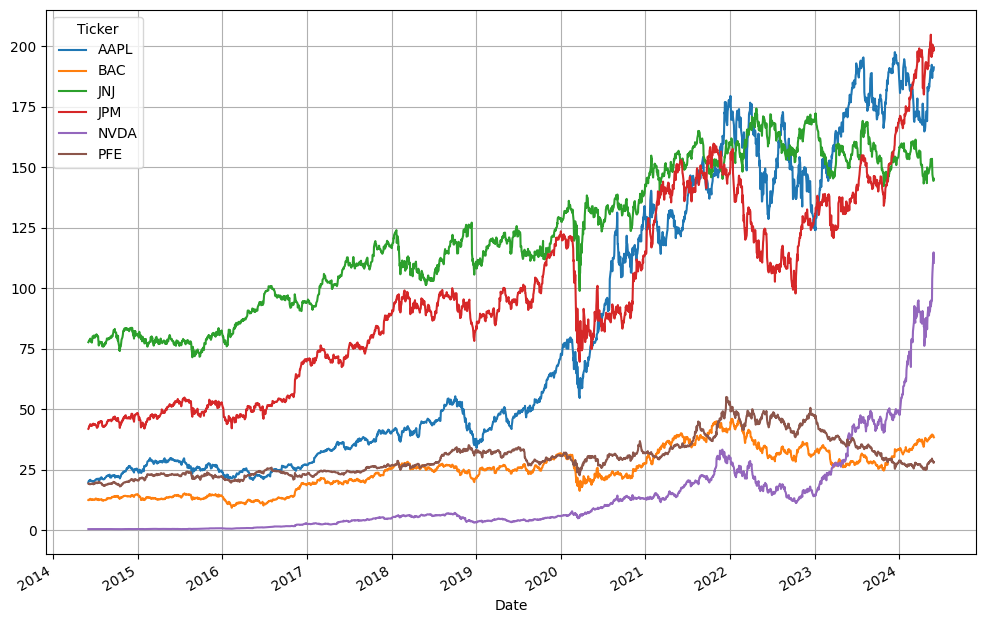

In [8]:
daily_close_px.plot(figsize=(12,8))
plt.grid()

### Grafici di prezzi e volumi per ogni asset

In [9]:
# TODO: Decidere se implementare nella relazione

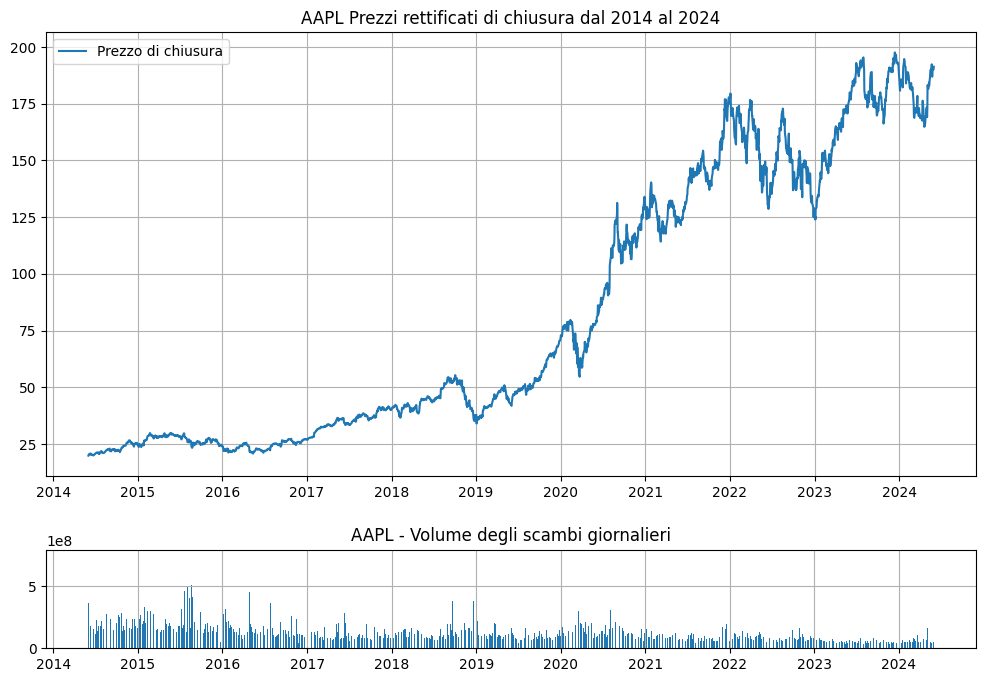

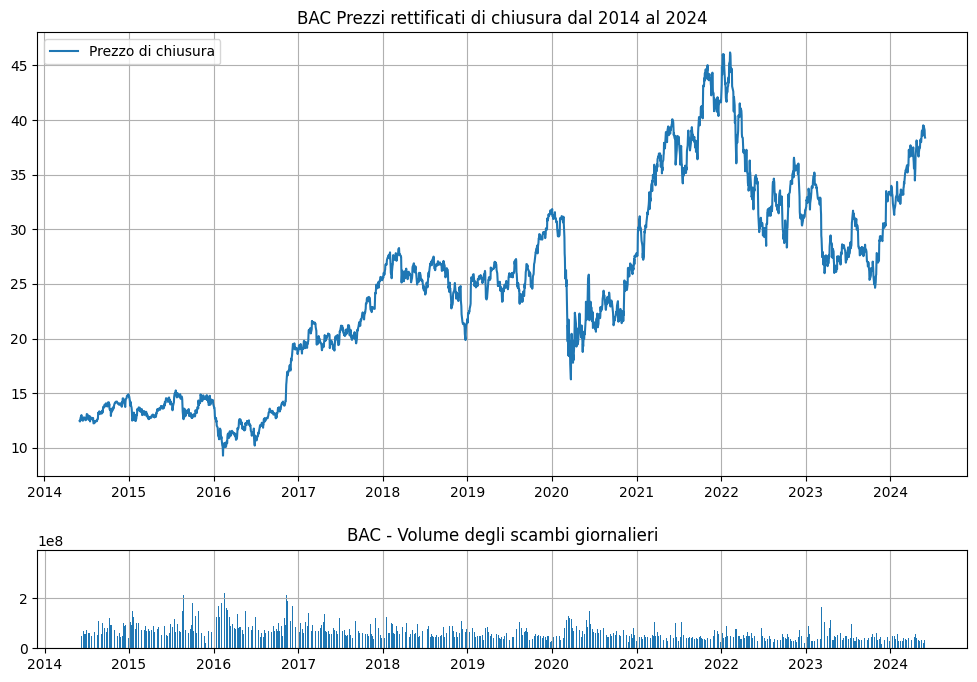

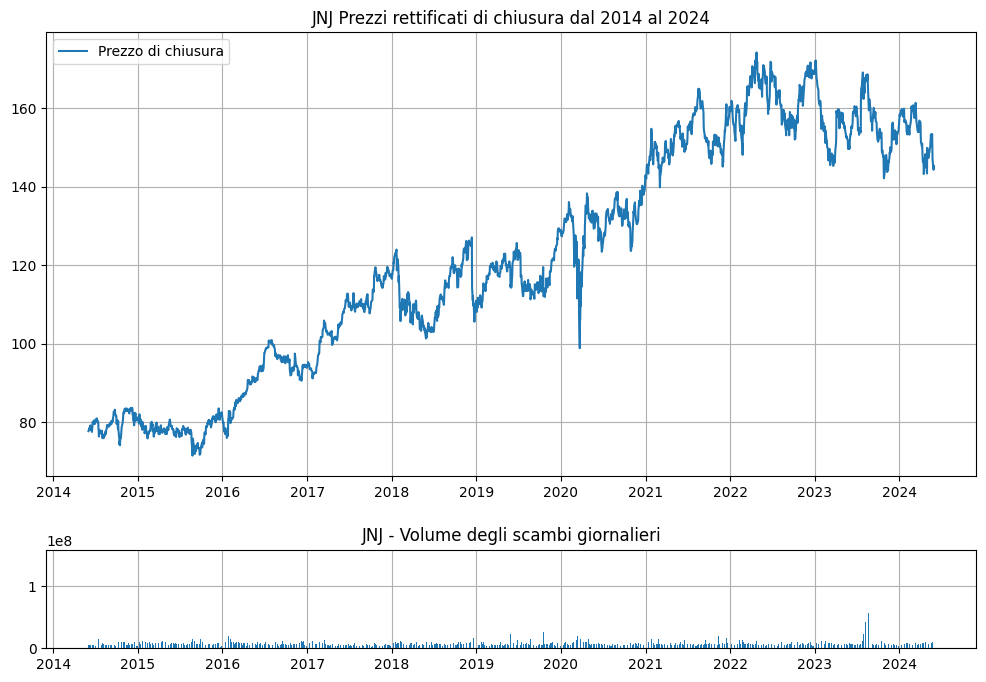

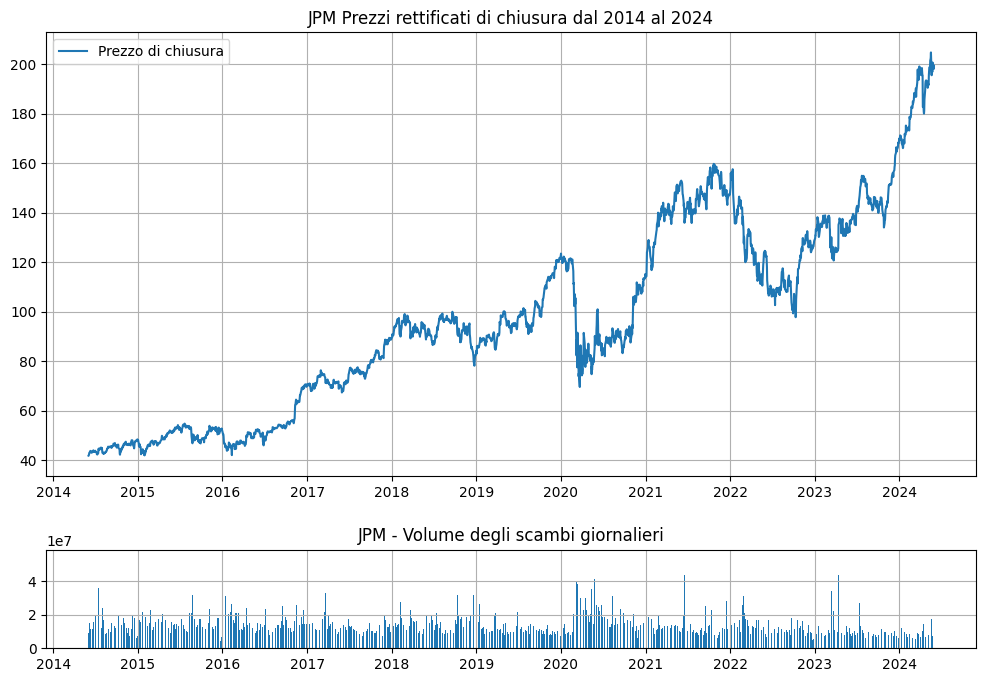

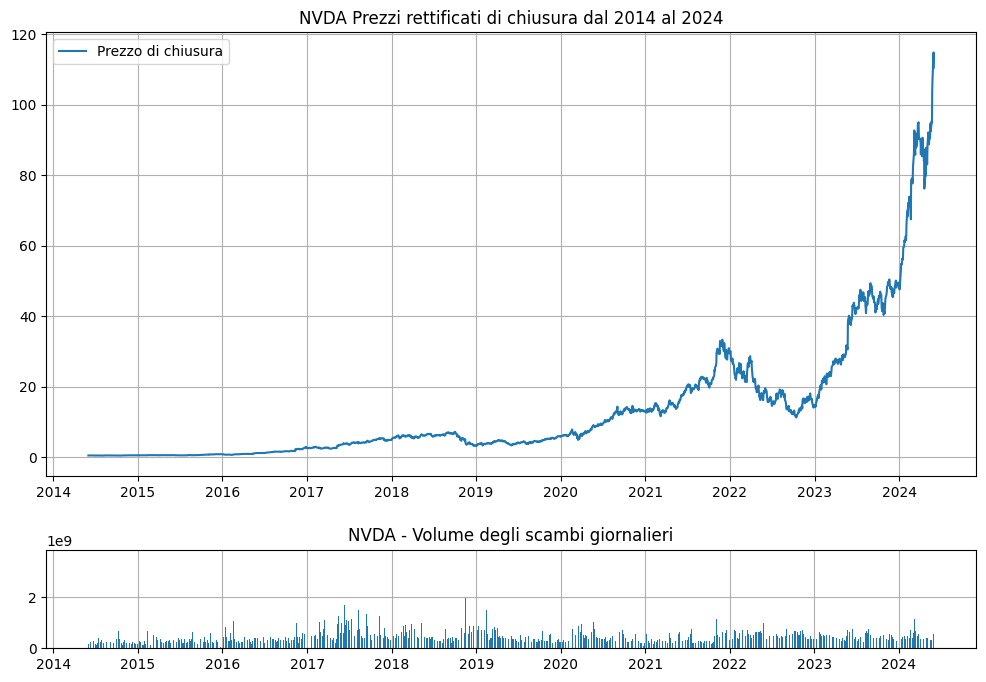

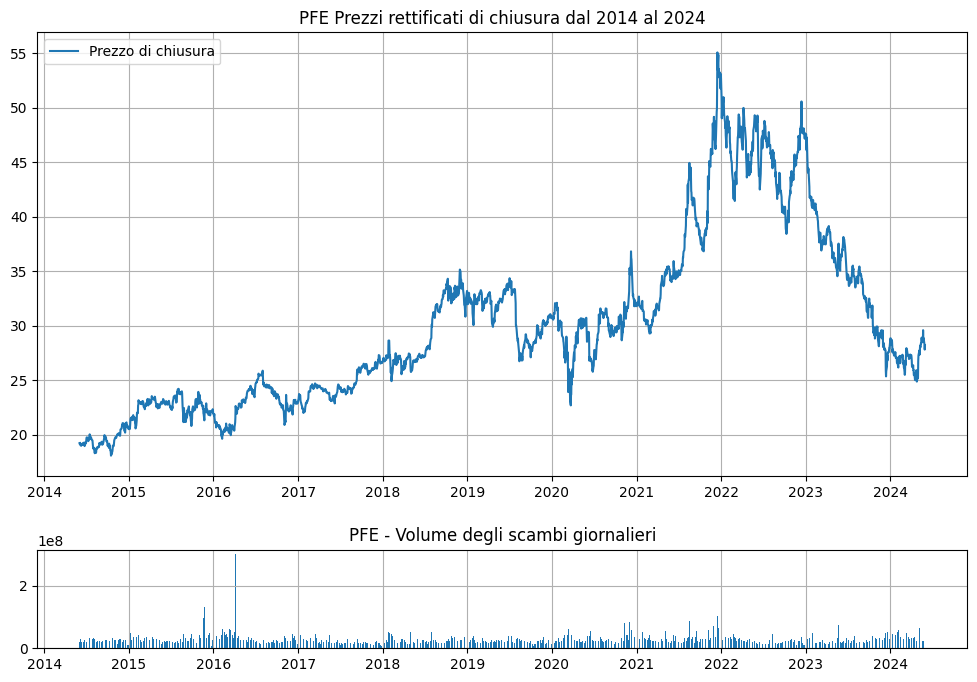

In [10]:
for ticker in daily_close_px.columns:
    top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan = 4)
    top.plot(daily_close_px.index,
            daily_close_px[ticker],
            label = 'Prezzo di chiusura')
    plt.title(f'{ticker} Prezzi rettificati di chiusura dal 2014 al 2024')
    plt.legend(loc=2)
    plt.grid()
    bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
    bottom.bar(all_data.Volume.loc[ticker].index, all_data.Volume.loc[ticker])
    plt.title(f'{ticker} - Volume degli scambi giornalieri')
    plt.gcf().set_size_inches(12,8)
    plt.subplots_adjust(hspace=0.75)
    plt.grid()
    plt.show()

## Statistiche descrittive

### Rendimento percentuale

In [11]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.dropna(inplace=True)
daily_pct_change.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014141,-0.003276,0.002839,0.004517,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001439,0.001060,0.001690
2014-06-05,0.003923,0.014464,0.005259,0.017062,0.004237,0.004048
2014-06-06,-0.002750,0.010370,-0.000388,0.006004,0.003692,-0.011425
2014-06-09,0.016002,0.016036,0.000388,0.007899,0.001051,-0.002380


### Rendimento Cumulato

In [12]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,1.014141,0.996724,1.002839,1.004517,0.995776,0.995961
2014-06-04,1.025722,0.996724,1.004992,1.005962,0.996832,0.997644
2014-06-05,1.029746,1.011140,1.010277,1.023126,1.001056,1.001683
2014-06-06,1.026915,1.021626,1.009885,1.029268,1.004752,0.990239
2014-06-09,1.043347,1.038008,1.010277,1.037399,1.005808,0.987882
...,...,...,...,...,...,...
2024-05-23,9.410155,3.125560,1.926440,4.699450,230.265570,1.491575
2024-05-24,9.566252,3.167851,1.891308,4.789898,236.188634,1.501453
2024-05-28,9.566756,3.137529,1.857979,4.761021,252.675628,1.471299


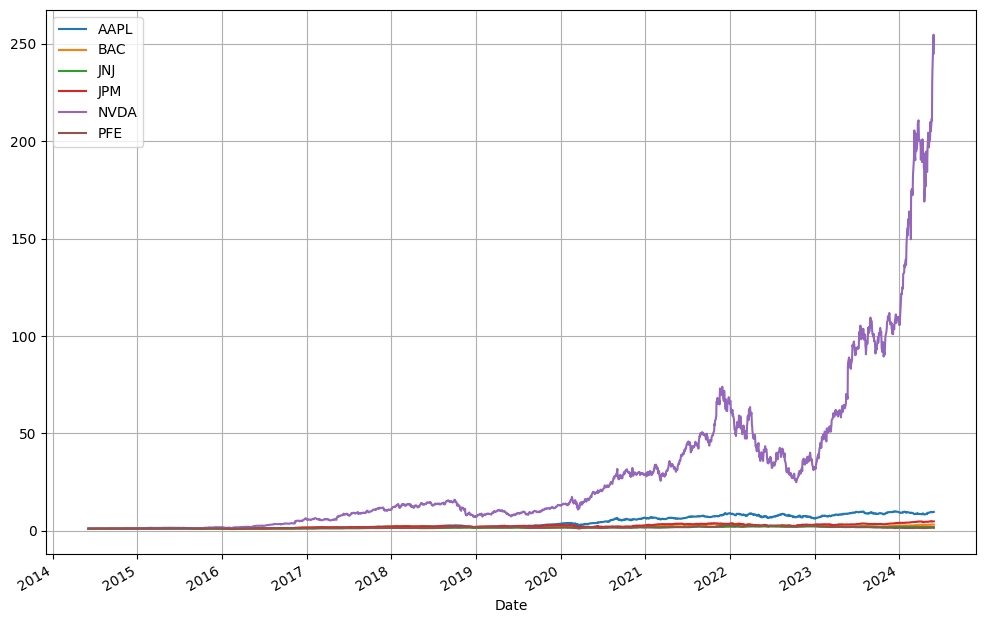

In [13]:
cum_daily_return.plot(figsize = (12,8))
plt.legend(loc=2)
plt.grid()

In [14]:
# TODO: Magari fare un grafico per ognuno e Decidere se implementare nella relazione

### Rendimento composto annuo

In [15]:
annual_compounded_returns = (cum_daily_return.iloc[-1] ** (1 / 10)) - 1
annual_compounded_returns

Ticker
AAPL    0.254217
BAC     0.119154
JNJ     0.064569
JPM     0.168781
NVDA    0.733564
PFE     0.039002
Name: 2024-05-30 00:00:00, dtype: float64

### Rendimento Semplice Netto e Lordo e Rendimento Logaritmico

In [16]:
daily_RS_gross = daily_close_px / daily_close_px.shift(1)
daily_RS_gross.dropna(inplace=True)
daily_RS_gross.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,1.014141,0.996724,1.002839,1.004517,0.995776,0.995961
2014-06-04,1.011419,1.000000,1.002147,1.001439,1.001060,1.001690
2014-06-05,1.003923,1.014464,1.005259,1.017062,1.004237,1.004048
2014-06-06,0.997250,1.010370,0.999612,1.006004,1.003692,0.988575
2014-06-09,1.016002,1.016036,1.000388,1.007899,1.001051,0.997620


In [17]:
daily_RS_net = daily_close_px.pct_change(1)
daily_RS_net.dropna(inplace=True)
daily_RS_net.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014141,-0.003276,0.002839,0.004517,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001439,0.001060,0.001690
2014-06-05,0.003923,0.014464,0.005259,0.017062,0.004237,0.004048
2014-06-06,-0.002750,0.010370,-0.000388,0.006004,0.003692,-0.011425
2014-06-09,0.016002,0.016036,0.000388,0.007899,0.001051,-0.002380


In [18]:
import numpy as np
daily_RL = np.log(daily_RS_gross)
daily_RL.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014042,-0.003282,0.002835,0.004507,-0.004233,-0.004047
2014-06-04,0.011355,0.000000,0.002145,0.001438,0.001060,0.001689
2014-06-05,0.003916,0.014360,0.005245,0.016918,0.004229,0.004040
2014-06-06,-0.002754,0.010316,-0.000388,0.005986,0.003685,-0.011491
2014-06-09,0.015875,0.015909,0.000388,0.007868,0.001050,-0.002382


Unisco tutti i rendimenti per ogni asset e faccio un grafico

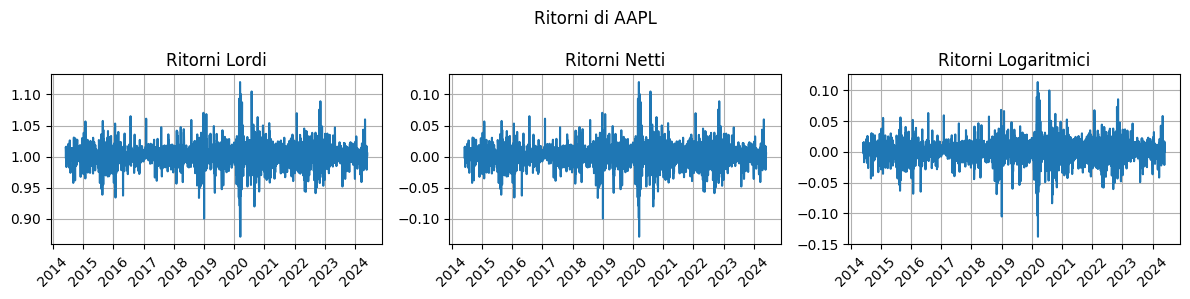

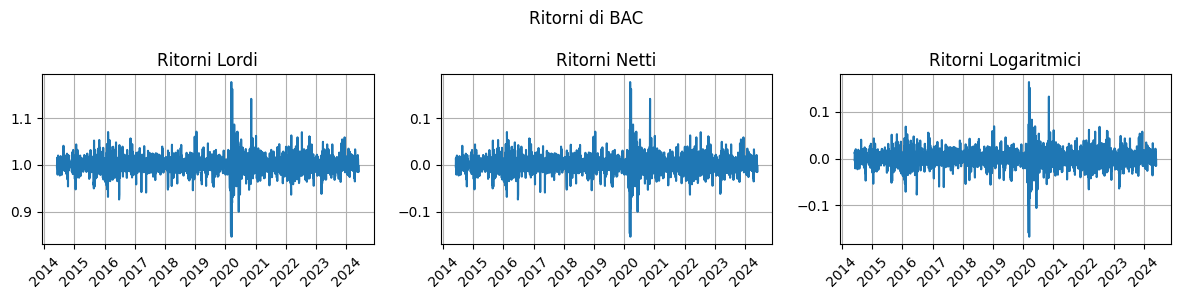

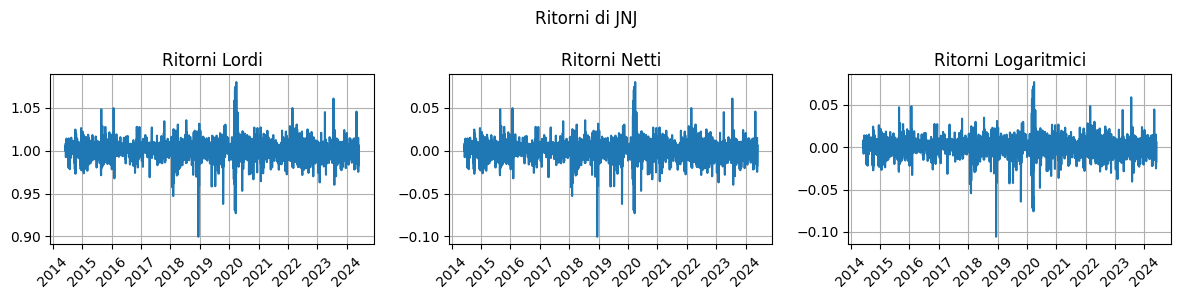

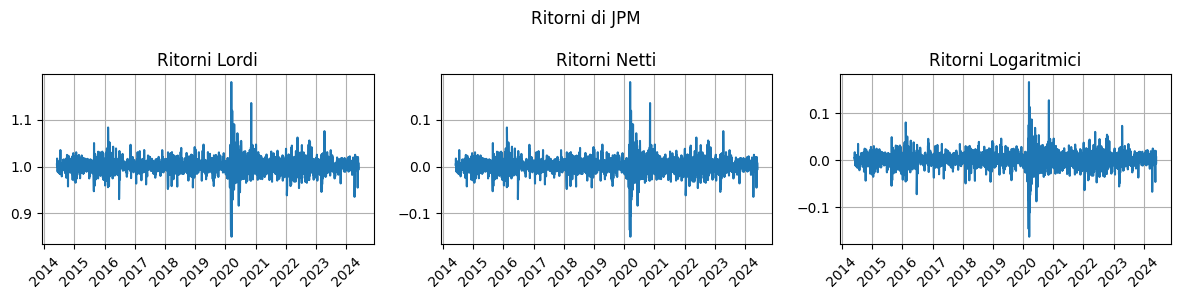

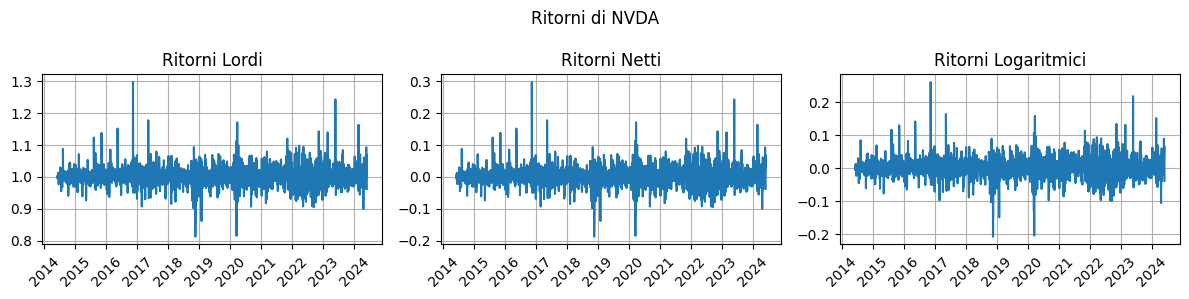

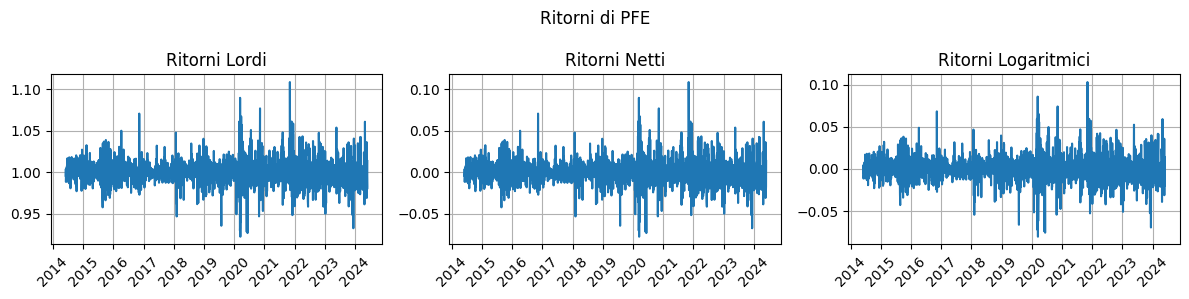

In [19]:
for ticker in daily_RS_gross.columns:
    fig, axs = plt.subplots(1,3, figsize=(12,3))
    fig.suptitle(f'Ritorni di {ticker}')
    axs[0].plot(daily_RS_gross[ticker])
    axs[0].set_title('Ritorni Lordi')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid()
    axs[1].plot(daily_RS_net[ticker])
    axs[1].set_title('Ritorni Netti')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid()
    axs[2].plot(daily_RL[ticker])
    axs[2].set_title('Ritorni Logaritmici')
    axs[2].tick_params(axis='x', rotation=45)
    axs[2].grid()
    plt.tight_layout()
    plt.show()

### Describe per ogni asset

In [20]:
aapl = daily_pct_change['AAPL']
aapl.describe()

count    2516.000000
mean        0.001060
std         0.017841
min        -0.128647
25%        -0.007315
50%         0.000821
75%         0.010141
max         0.119808
Name: AAPL, dtype: float64

In [21]:
nvda = daily_pct_change['NVDA']
nvda.describe()

count    2516.000000
mean        0.002629
std         0.029824
min        -0.187559
25%        -0.011623
50%         0.002392
75%         0.016955
max         0.298067
Name: NVDA, dtype: float64

In [22]:
jpm = daily_pct_change['JPM']
jpm.describe()

count    2516.000000
mean        0.000764
std         0.016972
min        -0.149649
25%        -0.007065
50%         0.000615
75%         0.008523
max         0.180125
Name: JPM, dtype: float64

In [23]:
bac = daily_pct_change['BAC']
bac.describe()

count    2516.000000
mean        0.000637
std         0.019474
min        -0.153974
25%        -0.009021
50%         0.000489
75%         0.010463
max         0.177962
Name: BAC, dtype: float64

In [24]:
jnj = daily_pct_change['JNJ']
jnj.describe()

count    2516.000000
mean        0.000313
std         0.011374
min        -0.100379
25%        -0.004920
50%         0.000293
75%         0.005979
max         0.079977
Name: JNJ, dtype: float64

In [25]:
pfe = daily_pct_change['PFE']
pfe.describe()

count    2516.000000
mean        0.000255
std         0.014380
min        -0.077346
25%        -0.006703
50%         0.000000
75%         0.007036
max         0.108552
Name: PFE, dtype: float64

### Grafici a 3 sezioni per ogni azione

Calcolo il numero corretto di colonne utilizzando la formula di Freedman-Diaconis

In [26]:
from scipy import stats

bins = (np.max(aapl, axis = 0) - np.min(aapl, axis = 0)) / (2*stats.iqr(aapl, axis = 0) / np.power(len(aapl), 1.0/3))
bins = int(bins)

bins

96

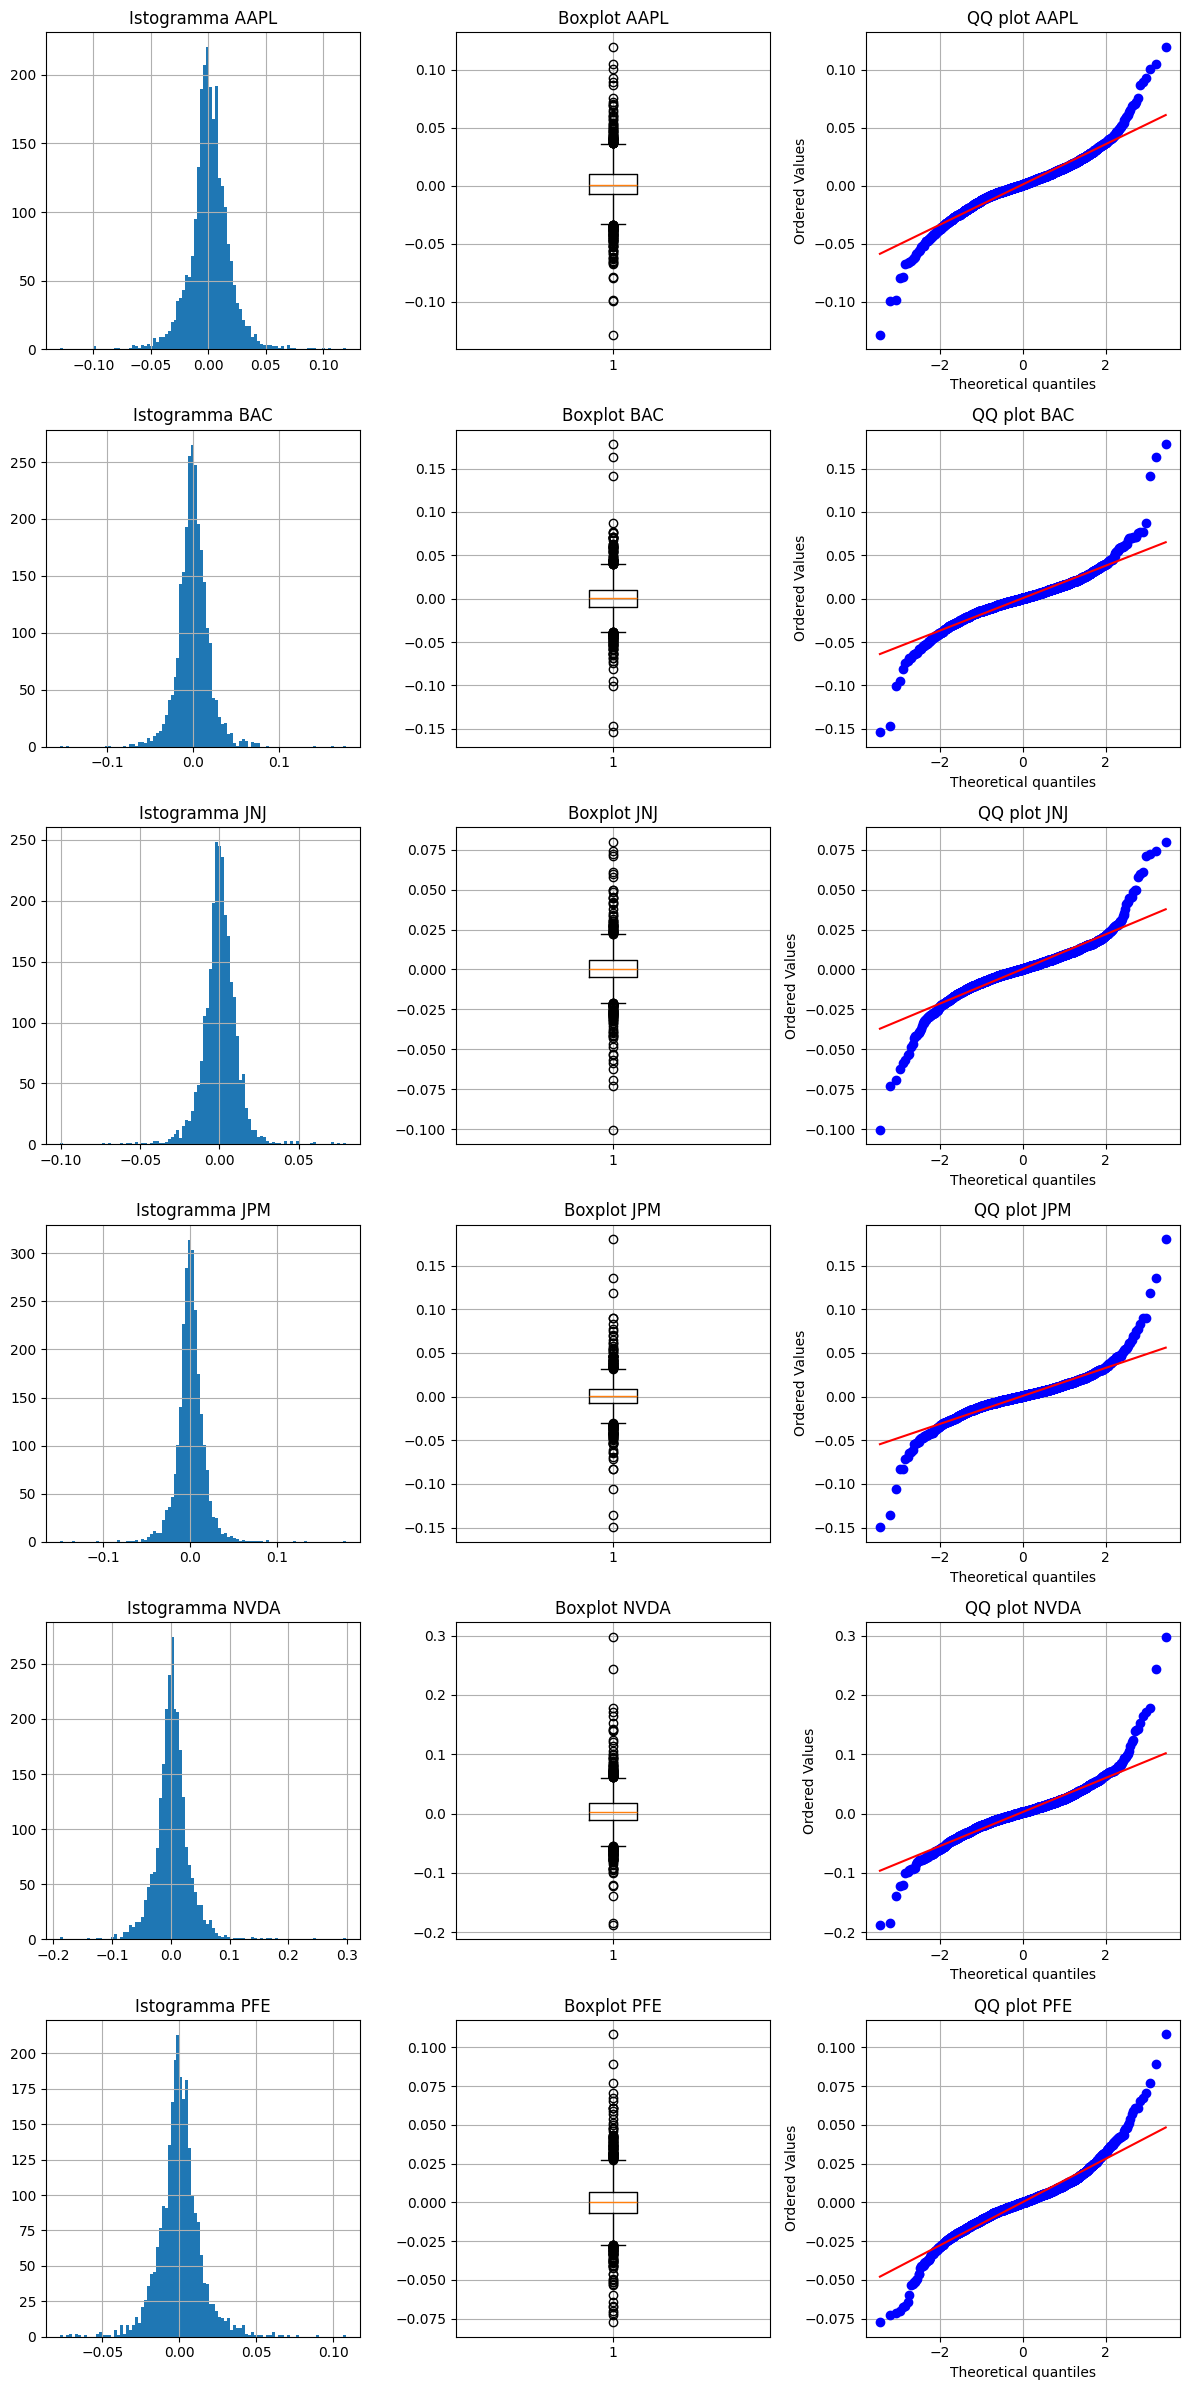

In [27]:
fig, axs = plt.subplots(6,3, figsize=(12,24))
for i, ticker in enumerate(daily_pct_change.columns):
    axs[i,0].hist(daily_pct_change[ticker], bins=bins)
    axs[i,0].set_title(f'Istogramma {ticker}')
    axs[i,0].grid()
    axs[i,1].boxplot(daily_pct_change[ticker])
    axs[i,1].set_title(f'Boxplot {ticker}')
    axs[i,1].grid()
    stats.probplot(daily_pct_change[ticker], dist='norm', plot=axs[i,2])
    axs[i,2].set_title(f'QQ plot {ticker}')
    axs[i,2].grid()
plt.tight_layout()
plt.show()

### Statistiche descrittive univariate

Calcolo media, varianza, deviazione standard, asimmetria e curtosi per ogni asset

In [28]:
from scipy.stats import skew, kurtosis

def calculate_statistics(df):
    stats = pd.DataFrame(index=df.columns, columns=['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'])

    stats['Mean'] = df.mean()
    stats['Variance'] = df.var()
    stats['Standard Deviation'] = df.std()
    stats['Skewness'] = df.apply(skew)
    stats['Kurtosis'] = df.apply(kurtosis)

    return stats

calculate_statistics(daily_pct_change)

,Mean,Variance,Standard Deviation,Skewness,Kurtosis
Ticker,,,,,
AAPL,0.001060,0.000318,0.017841,-0.018286,5.347815
BAC,0.000637,0.000379,0.019474,0.282625,10.075077
JNJ,0.000313,0.000129,0.011374,-0.175335,9.342206
JPM,0.000764,0.000288,0.016972,0.297474,14.082749
NVDA,0.002629,0.000889,0.029824,0.689948,9.250431
PFE,0.000255,0.000207,0.014380,0.303754,5.301888


### Matrice di varianze/covarianze e Correlazione dei rendimenti

In [29]:
cov_matrix = daily_RS_net.cov()
cov_matrix

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Ticker,,,,,,
AAPL,0.000318,0.000146,0.000074,0.000131,0.000289,0.000079
BAC,0.000146,0.000379,0.000083,0.000296,0.000197,0.000098
JNJ,0.000074,0.000083,0.000129,0.000080,0.000069,0.000086
JPM,0.000131,0.000296,0.000080,0.000288,0.000175,0.000093
NVDA,0.000289,0.000197,0.000069,0.000175,0.000889,0.000080
PFE,0.000079,0.000098,0.000086,0.000093,0.000080,0.000207


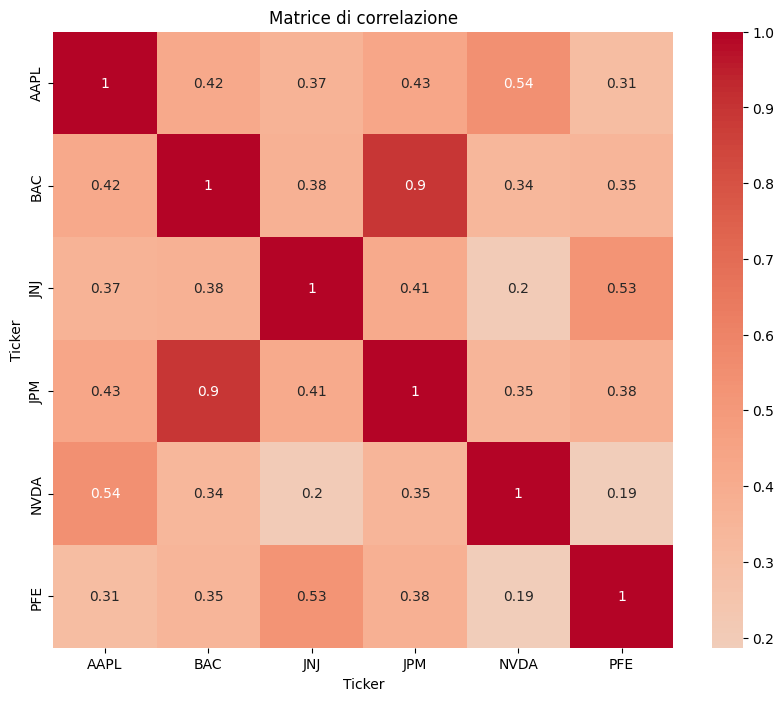

In [30]:
import seaborn as sns
corr_matrix = daily_RS_net.corr()
corr_matrix

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di correlazione')
plt.show()

### Grafici di correlazione

#### Settore Tecnologia

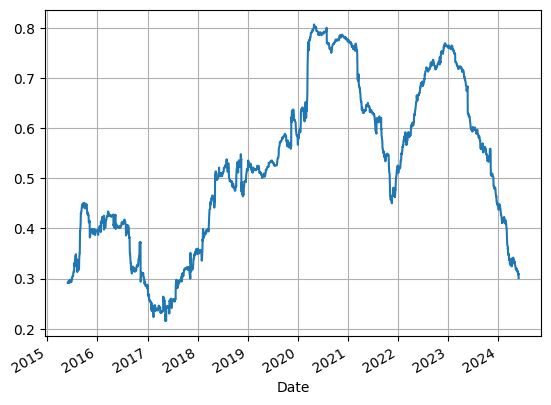

In [31]:
daily_pct_change['AAPL'].rolling(250).corr(daily_pct_change['NVDA']).plot()
plt.grid()

#### Settore Finanziario

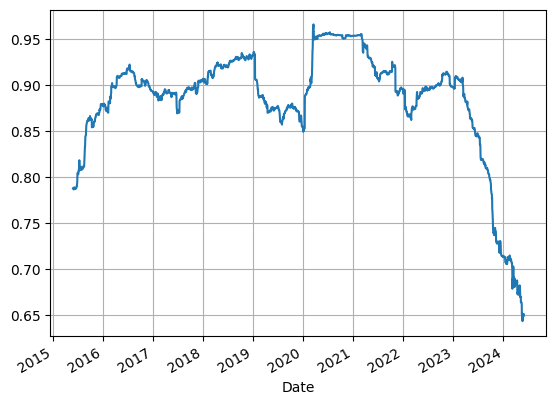

In [32]:
daily_pct_change['JPM'].rolling(250).corr(daily_pct_change['BAC']).plot()
plt.grid()

#### Settore Salute

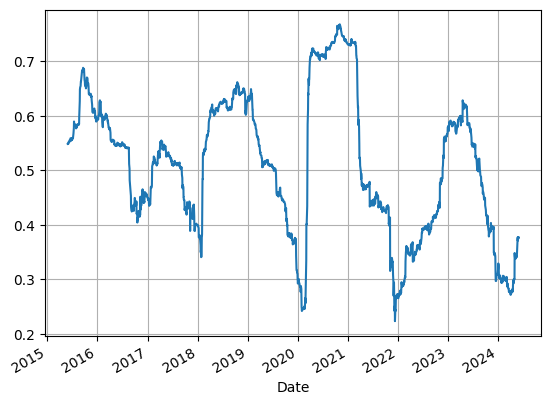

In [33]:
daily_pct_change['JNJ'].rolling(250).corr(daily_pct_change['PFE']).plot()
plt.grid()

### Grafici di Dispersione

In [35]:
def render_scatter_plot(data, x_stock_name,
                       y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10,10),(-10,10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

#### Settore Tecnologia

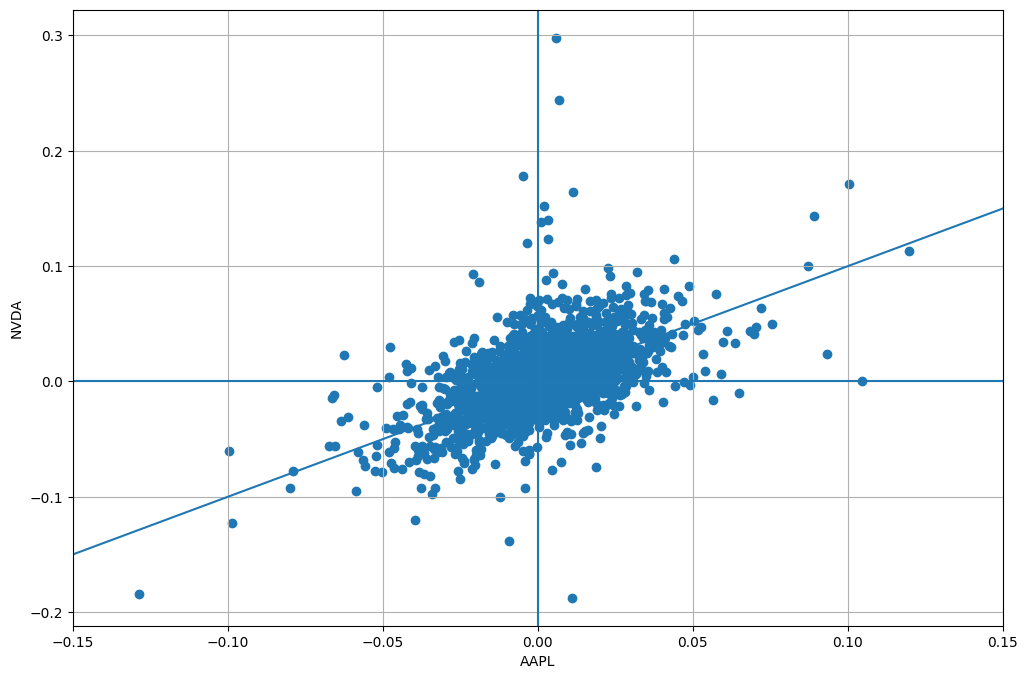

In [36]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'AAPL', 'NVDA', xlim=limits)
plt.grid()

#### Settore Finanziario

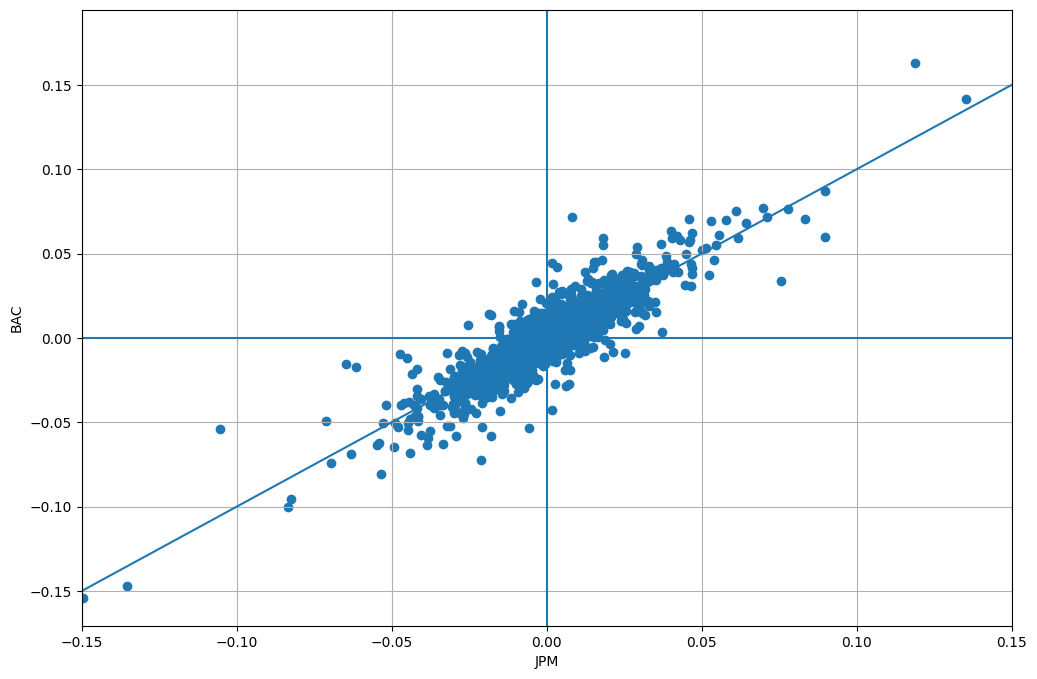

In [37]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'JPM', 'BAC', xlim=limits)
plt.grid()

#### Settore Salute

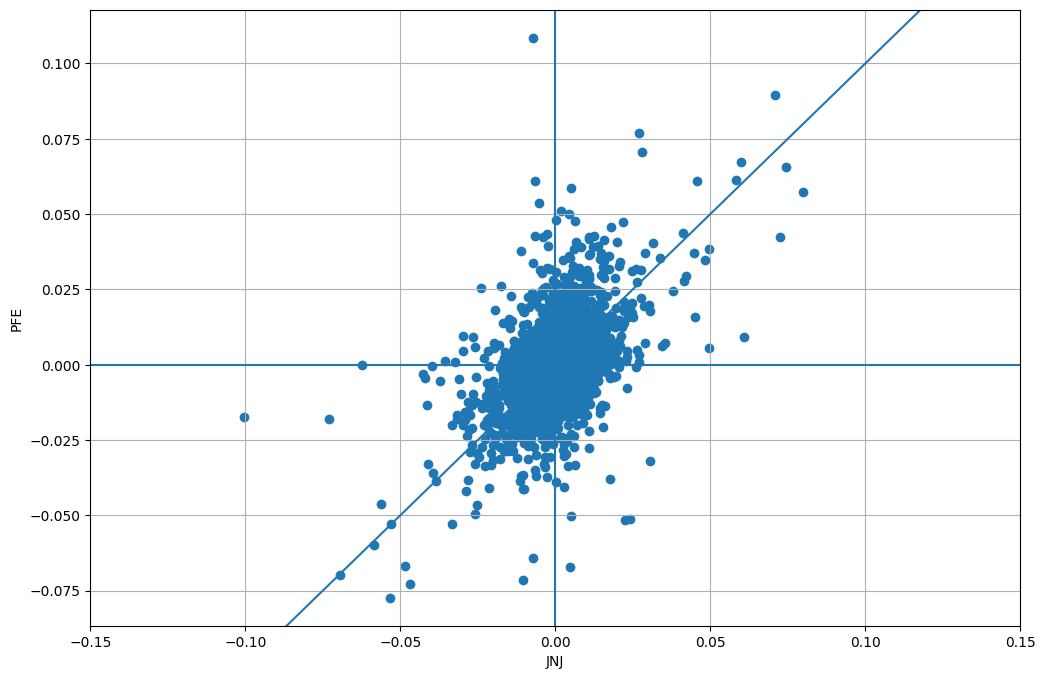

In [38]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'JNJ', 'PFE', xlim=limits)
plt.grid()

#### Matrice di scatter plot

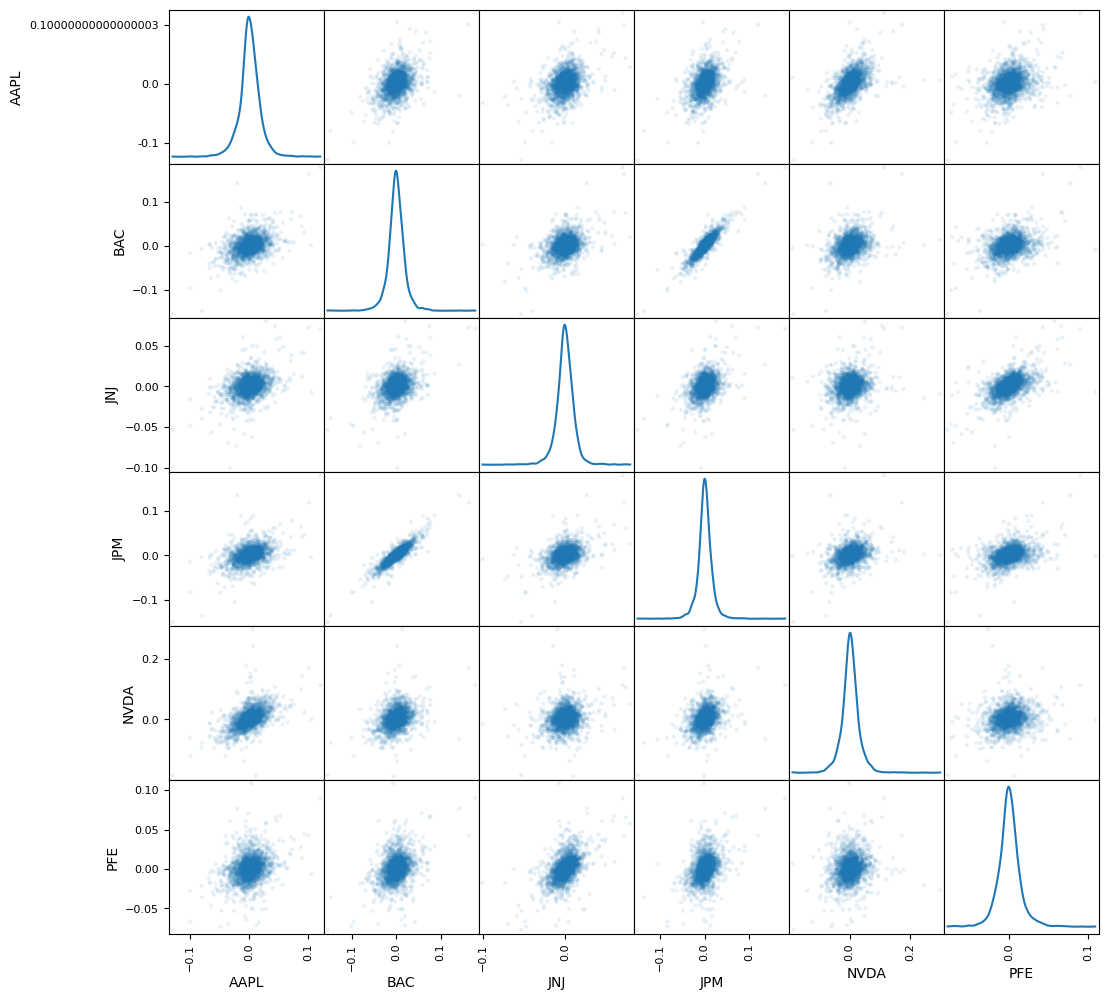

In [40]:
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12,12))